<a href="https://colab.research.google.com/github/aviatorpranoy/materialsinformatics/blob/master/bcsg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import io
import requests
url="https://raw.githubusercontent.com/aviatorpranoy/materialsinformatics/master/visual2.csv"
s=requests.get(url).content
features=pd.read_csv(io.StringIO(s.decode('utf-8')))
features.head()

,Formula,PG,First,SG1,Second,SG2
0,HBr,mmm,H,P63/mmc,Br,Cmca
1,H2C,mmm,H,P63/mmc,C,P63/mmc
2,H4C,-43m,H,P63/mmc,C,P63/mmc
3,HC,2/m,H,P63/mmc,C,P63/mmc
4,HCl,m-3m,H,P63/mmc,Cl,Cmca


In [ ]:
features.describe()

,Formula,PG,First,SG1,Second,SG2
count,4991,4992,4992,4974,4992,4992
unique,3784,30,84,17,76,17
top,Al2O3,m-3m,Ti,P63/mmc,O,Fm-3m
freq,22,1710,215,2042,389,1244


In [ ]:
#One-Hot Encoding

# One-hot encode the data using pandas get_dummies
dummiesPG = pd.get_dummies(features.PG)
#dummiesSG1 = pd.get_dummies(features.SG1)
#dummiesSG2 = pd.get_dummies(features.SG2)

#featuresn = pd.get_dummies(features.PG)
#merged = pd.concat([features, dummiesPG], axis = 'columns')

#, dummiesSG1, dummiesSG2

#merged

dummiesPG

,-1,-3,-3m,-4,-42m,-43m,-6m2,1,2,2/m,...,6,6/m,6/mmm,622,6mm,m,m-3,m-3m,mm2,mmm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4988,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
final = features.drop(['First','Second','SG1','SG2'], axis='columns')

#final=merged

final

,Formula,PG
0,HBr,mmm
1,H2C,mmm
2,H4C,-43m
3,HC,2/m
4,HCl,m-3m
...,...,...
4987,PuRu,m-3m
4988,PuSi2,6/mmm
4989,PuTe,m-3m
4990,PuTe,m-3m


In [ ]:
#features= final.drop(['S11','S12','S44'], axis = 'columns')

# Saving feature names for later use
feature_list = list(final.columns)

feature_list

['Formula', 'PG']

In [ ]:
# Use numpy to convert to arrays
import numpy as np

# Convert to numpy array
final = np.array(final)

final

array([['HBr', 'mmm'],
       ['H2C', 'mmm'],
       ['H4C', '-43m'],
       ...,
       ['PuTe', 'm-3m'],
       ['PuTe', 'm-3m'],
       ['PuZn2', 'm-3m']], dtype=object)

In [ ]:
sumPG = dummiesPG.sum()

sumPG = sumPG.to_frame().reset_index()

sumPG

,index,0
0,-1,15
1,-3,20
2,-3m,229
3,-4,2
4,-42m,26
5,-43m,162
6,-6m2,104
7,1,11
8,2,6
9,2/m,229


In [ ]:
#sumPG.column = ['type','amt']

#sumPG = sumPG.rename(columns= {'index': 'type', 0: 'amt'})
sumPG.index.name = 'index'
sumPG.columns = ['type','amt']

sumPG

,type,amt
index,,
0,-1,15
1,-3,20
2,-3m,229
3,-4,2
4,-42m,26
5,-43m,162
6,-6m2,104
7,1,11
8,2,6


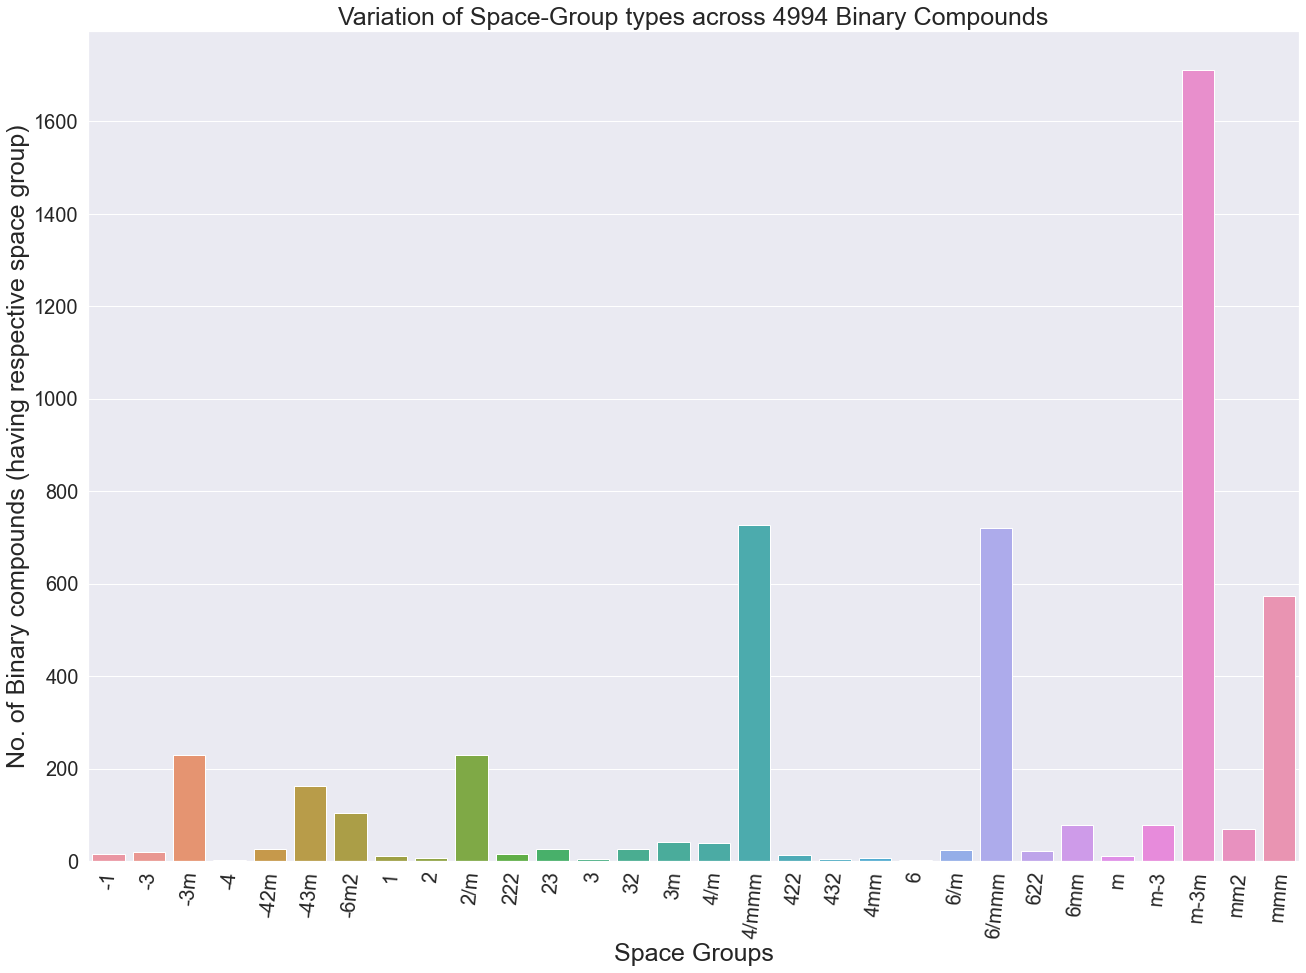

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="whitegrid")
#tips = sns.load_dataset("sumPG")

#ax = sns.barplot(x=sumPG.type, y=sumPG.amt, data=tips)
#sns.lmplot('type', 'amt', data=sumPG, fit_reg=False)
#sns.heatmap([sumPG.amt, sumPG.index], annot=True, fmt="d")

#sns.clustermap(sumPG)

#ax
sns.set(rc={'figure.figsize':(21.7,15.27)})

ax = sns.barplot(x=sumPG.type, y=sumPG.amt)

ax.set_xticklabels(ax.get_xticklabels(),rotation=85)

ax.axes.set_title("Variation of Space-Group types across 4994 Binary Compounds",fontsize=25)
ax.set_xlabel("Space Groups",fontsize=25)
ax.set_ylabel("No. of Binary compounds (having respective space group)",fontsize=25)
ax.tick_params(labelsize=20)
#sns.plt.show()

#ax.set(xlabel='Space Groups', ylabel='No. of Binary compounds (having respective space group)', title='Variation of Spcae-Group types across 4994 Binary Compounds')





In [6]:
dummiesPG = pd.get_dummies(features.PG)
final = features.drop(['First','Second','SG1','SG2'], axis='columns')

import numpy as np

# Convert to numpy array
final = np.array(final)

sumPG = dummiesPG.sum()

sumPG = sumPG.to_frame().reset_index()

sumPG.index.name = 'index'
sumPG.columns = ['type','amt']

sumPG

,type,amt
index,,
0,-1,15
1,-3,20
2,-3m,229
3,-4,2
4,-42m,26
5,-43m,162
6,-6m2,104
7,1,11
8,2,6


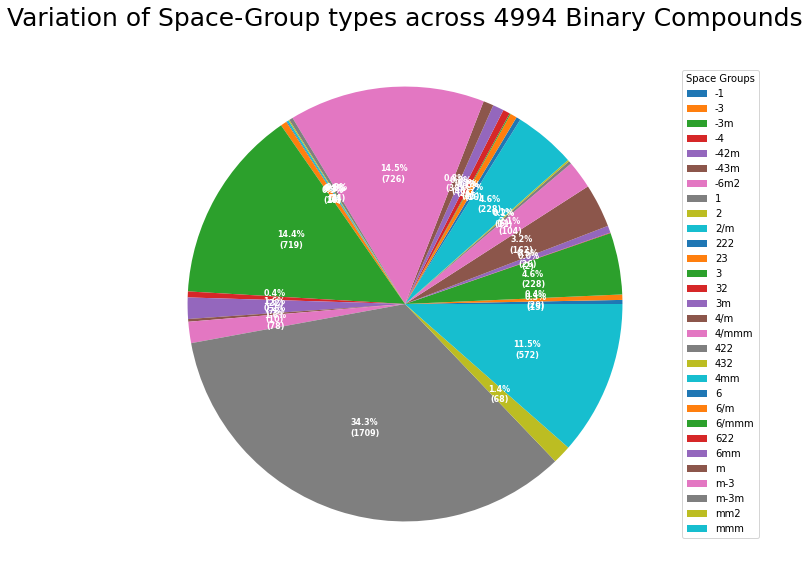

In [7]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

#recipe = ["375 g flour",
          #"75 g sugar",
          #"250 g butter",
          #"300 g berries"]

#data = [float(x.split()[0]) for x in recipe]
#ingredients = [x.split()[-1] for x in recipe]

data = sumPG.amt
ingredients = sumPG.type

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Space Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Variation of Space-Group types across 4994 Binary Compounds",fontsize=25)

plt.show()